In [2]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import scipy.io as sio
import keras as ks
from sklearn import preprocessing
import random
tf.__version__

Using TensorFlow backend.


'1.12.0'

In [33]:
def loadData(image):

    if image is 1:
        a = sio.loadmat('San_Diego.mat')
    elif image is 2:
        a = sio.loadmat('Airport.mat')
    elif image is 3:
        a = sio.loadmat('Beach.mat')
    elif image is 4:
        a = sio.loadmat('Urban.mat')
    elif image is 5:
        a = sio.loadmat('HYDICE_urban.mat')
    data = a['data']
    labels = a['map']
    return data, labels

def reshape_to_input_format(input_):
    tmp = np.zeros([1,189,1])
    for i in range(input_.shape[0]):
        tmp[0][i][0] = input_[i]
    return tmp

def prepair_data(img, gt, x_start, x_end, y_start, y_end):
    data = []
    lable = []
    
    for y in range(y_start,y_end):
        for x in range(x_start,x_end):
            p = img[y][x][:]
            g = gt[y][x]

            t1 = img[y-2][x-2][:]
            t2 = img[y-2][x-1][:]
            t3 = img[y-2][x][:]
            t4 = img[y-2][x+1][:]
            t5 = img[y-2][x+2][:]
            t6 = img[y-1][x+2][:]
            t7 = img[y][x+2][:]
            t8 = img[y+1][x+2][:]
            t9 = img[y+2][x+2][:]
            t10 = img[y+2][x+1][:]
            t11 = img[y+2][x][:]
            t12 = img[y+2][x-1][:]
            t13 = img[y+2][x-2][:]
            t14 = img[y+1][x-2][:]
            t15 = img[y][x-2][:]
            t16 = img[y-1][x-2][:]

            g1 = gt[y-2][x-2]
            g2 = gt[y-2][x-1]
            g3 = gt[y-2][x]
            g4 = gt[y-2][x+1]
            g5 = gt[y-2][x+2]
            g6 = gt[y-1][x+2]
            g7 = gt[y][x+2]
            g8 = gt[y+1][x+2]
            g9 = gt[y+2][x+2]
            g10 = gt[y+2][x+1]
            g11 = gt[y+2][x]
            g12 = gt[y+2][x-1]
            g13 = gt[y+2][x-2]
            g14 = gt[y+1][x-2]
            g15 = gt[y][x-2]
            g16 = gt[y-1][x-2]

            data.append(reshape_to_input_format(np.abs(p-t1)))
            data.append(reshape_to_input_format(np.abs(p-t2)))
            data.append(reshape_to_input_format(np.abs(p-t3)))
            data.append(reshape_to_input_format(np.abs(p-t4)))
            data.append(reshape_to_input_format(np.abs(p-t5)))
            data.append(reshape_to_input_format(np.abs(p-t6)))
            data.append(reshape_to_input_format(np.abs(p-t7)))
            data.append(reshape_to_input_format(np.abs(p-t8)))
            data.append(reshape_to_input_format(np.abs(p-t9)))
            data.append(reshape_to_input_format(np.abs(p-t10)))
            data.append(reshape_to_input_format(np.abs(p-t11)))
            data.append(reshape_to_input_format(np.abs(p-t12)))
            data.append(reshape_to_input_format(np.abs(p-t13)))
            data.append(reshape_to_input_format(np.abs(p-t14)))
            data.append(reshape_to_input_format(np.abs(p-t15)))
            data.append(reshape_to_input_format(np.abs(p-t16)))

            lable.append(np.abs(g-g1))
            lable.append(np.abs(g-g2))
            lable.append(np.abs(g-g3))
            lable.append(np.abs(g-g4))
            lable.append(np.abs(g-g5))
            lable.append(np.abs(g-g6))
            lable.append(np.abs(g-g7))
            lable.append(np.abs(g-g8))
            lable.append(np.abs(g-g9))
            lable.append(np.abs(g-g10))
            lable.append(np.abs(g-g11))
            lable.append(np.abs(g-g12))
            lable.append(np.abs(g-g13))
            lable.append(np.abs(g-g14))
            lable.append(np.abs(g-g15))
            lable.append(np.abs(g-g16))

    return data,lable

C:\Users\This Is Mahdi\Anaconda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:68: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\This Is Mahdi\Anaconda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:67: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\This Is Mahdi\Anaconda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:66: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\This Is Mahdi\Anaconda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:65: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\This Is Mahdi\Anaconda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\This Is Mahdi\Anaconda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:72: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\This Is Mahdi\Anaconda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:73: Runt

40000


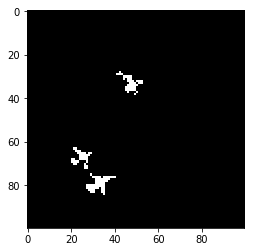

In [81]:
#generate your data here
img, gt = loadData(image=1)
img = np.float64(img)
plt.imshow(gt,cmap='gray')
data = []
lable = []

for y in range(40,90):
    for x in range(10,60):
        p = img[y][x][:]
        g = gt[y][x]

        t1 = img[y-2][x-2][:]
        t2 = img[y-2][x-1][:]
        t3 = img[y-2][x][:]
        t4 = img[y-2][x+1][:]
        t5 = img[y-2][x+2][:]
        t6 = img[y-1][x+2][:]
        t7 = img[y][x+2][:]
        t8 = img[y+1][x+2][:]
        t9 = img[y+2][x+2][:]
        t10 = img[y+2][x+1][:]
        t11 = img[y+2][x][:]
        t12 = img[y+2][x-1][:]
        t13 = img[y+2][x-2][:]
        t14 = img[y+1][x-2][:]
        t15 = img[y][x-2][:]
        t16 = img[y-1][x-2][:]
        
        g1 = gt[y-2][x-2]
        g2 = gt[y-2][x-1]
        g3 = gt[y-2][x]
        g4 = gt[y-2][x+1]
        g5 = gt[y-2][x+2]
        g6 = gt[y-1][x+2]
        g7 = gt[y][x+2]
        g8 = gt[y+1][x+2]
        g9 = gt[y+2][x+2]
        g10 = gt[y+2][x+1]
        g11 = gt[y+2][x]
        g12 = gt[y+2][x-1]
        g13 = gt[y+2][x-2]
        g14 = gt[y+1][x-2]
        g15 = gt[y][x-2]
        g16 = gt[y-1][x-2]
        
        data.append(reshape_to_input_format(np.abs(p-t1)))
        data.append(reshape_to_input_format(np.abs(p-t2)))
        data.append(reshape_to_input_format(np.abs(p-t3)))
        data.append(reshape_to_input_format(np.abs(p-t4)))
        data.append(reshape_to_input_format(np.abs(p-t5)))
        data.append(reshape_to_input_format(np.abs(p-t6)))
        data.append(reshape_to_input_format(np.abs(p-t7)))
        data.append(reshape_to_input_format(np.abs(p-t8)))
        data.append(reshape_to_input_format(np.abs(p-t9)))
        data.append(reshape_to_input_format(np.abs(p-t10)))
        data.append(reshape_to_input_format(np.abs(p-t11)))
        data.append(reshape_to_input_format(np.abs(p-t12)))
        data.append(reshape_to_input_format(np.abs(p-t13)))
        data.append(reshape_to_input_format(np.abs(p-t14)))
        data.append(reshape_to_input_format(np.abs(p-t15)))
        data.append(reshape_to_input_format(np.abs(p-t16)))
        
        lable.append(np.abs(g-g1))
        lable.append(np.abs(g-g2))
        lable.append(np.abs(g-g3))
        lable.append(np.abs(g-g4))
        lable.append(np.abs(g-g5))
        lable.append(np.abs(g-g6))
        lable.append(np.abs(g-g7))
        lable.append(np.abs(g-g8))
        lable.append(np.abs(g-g9))
        lable.append(np.abs(g-g10))
        lable.append(np.abs(g-g11))
        lable.append(np.abs(g-g12))
        lable.append(np.abs(g-g13))
        lable.append(np.abs(g-g14))
        lable.append(np.abs(g-g15))
        lable.append(np.abs(g-g16))
print(len(data))

In [82]:
data_ones = []
lable_ones = []

data_zero = []
lable_zero = []

for i in range(len(data)):
    if lable[i]==1:
        data_ones.append(data[i])
        lable_ones.append(1)
        
for i in range(len(data)):
    if lable[i]==0:
        data_zero.append(data[i])
        lable_ones.append(0)

data_ones = data_ones[:800]
data_zero = data_zero[:800]  
train_data = []
train_lable = []

for i in range(1600):
    if i%2==0:
        train_data.append(data_ones.pop())
        train_lable.append(1)
    else:
        train_data.append(data_zero.pop())
        train_lable.append(0)
print(len(train_data))
print(len(train_lable))

1600
1600


C:\Users\This Is Mahdi\Anaconda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:67: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\This Is Mahdi\Anaconda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:66: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\This Is Mahdi\Anaconda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:65: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\This Is Mahdi\Anaconda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\This Is Mahdi\Anaconda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\This Is Mahdi\Anaconda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: overflow encountered in ubyte_scalars
C:\Users\This Is Mahdi\Anaconda\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:72: Runt

46400


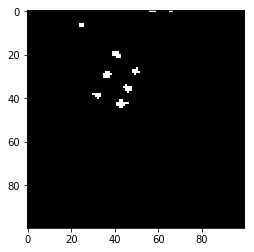

In [74]:
img, gt = loadData(image=4)
img = np.float64(img)
plt.imshow(gt,cmap='gray')
mdata = []
mlable = []

for y in range(2,60):
    for x in range(10,60):
        p = img[y][x][:189]
        g = gt[y][x]

        t1 = img[y-2][x-2][:189]
        t2 = img[y-2][x-1][:189]
        t3 = img[y-2][x][:189]
        t4 = img[y-2][x+1][:189]
        t5 = img[y-2][x+2][:189]
        t6 = img[y-1][x+2][:189]
        t7 = img[y][x+2][:189]
        t8 = img[y+1][x+2][:189]
        t9 = img[y+2][x+2][:189]
        t10 = img[y+2][x+1][:189]
        t11 = img[y+2][x][:189]
        t12 = img[y+2][x-1][:189]
        t13 = img[y+2][x-2][:189]
        t14 = img[y+1][x-2][:189]
        t15 = img[y][x-2][:189]
        t16 = img[y-1][x-2][:189]
        
        g1 = gt[y-2][x-2]
        g2 = gt[y-2][x-1]
        g3 = gt[y-2][x]
        g4 = gt[y-2][x+1]
        g5 = gt[y-2][x+2]
        g6 = gt[y-1][x+2]
        g7 = gt[y][x+2]
        g8 = gt[y+1][x+2]
        g9 = gt[y+2][x+2]
        g10 = gt[y+2][x+1]
        g11 = gt[y+2][x]
        g12 = gt[y+2][x-1]
        g13 = gt[y+2][x-2]
        g14 = gt[y+1][x-2]
        g15 = gt[y][x-2]
        g16 = gt[y-1][x-2]
        
        mdata.append(reshape_to_input_format(np.abs(p-t1)))
        mdata.append(reshape_to_input_format(np.abs(p-t2)))
        mdata.append(reshape_to_input_format(np.abs(p-t3)))
        mdata.append(reshape_to_input_format(np.abs(p-t4)))
        mdata.append(reshape_to_input_format(np.abs(p-t5)))
        mdata.append(reshape_to_input_format(np.abs(p-t6)))
        mdata.append(reshape_to_input_format(np.abs(p-t7)))
        mdata.append(reshape_to_input_format(np.abs(p-t8)))
        mdata.append(reshape_to_input_format(np.abs(p-t9)))
        mdata.append(reshape_to_input_format(np.abs(p-t10)))
        mdata.append(reshape_to_input_format(np.abs(p-t11)))
        mdata.append(reshape_to_input_format(np.abs(p-t12)))
        mdata.append(reshape_to_input_format(np.abs(p-t13)))
        mdata.append(reshape_to_input_format(np.abs(p-t14)))
        mdata.append(reshape_to_input_format(np.abs(p-t15)))
        mdata.append(reshape_to_input_format(np.abs(p-t16)))
        
        mlable.append(np.abs(g-g1))
        mlable.append(np.abs(g-g2))
        mlable.append(np.abs(g-g3))
        mlable.append(np.abs(g-g4))
        mlable.append(np.abs(g-g5))
        mlable.append(np.abs(g-g6))
        mlable.append(np.abs(g-g7))
        mlable.append(np.abs(g-g8))
        mlable.append(np.abs(g-g9))
        mlable.append(np.abs(g-g10))
        mlable.append(np.abs(g-g11))
        mlable.append(np.abs(g-g12))
        mlable.append(np.abs(g-g13))
        mlable.append(np.abs(g-g14))
        mlable.append(np.abs(g-g15))
        mlable.append(np.abs(g-g16))
print(len(mdata))

In [76]:
data_ones = []
lable_ones = []

data_zero = []
lable_zero = []

for i in range(len(mdata)):
    if mlable[i]==1:
        data_ones.append(mdata[i])
        lable_ones.append(1)
        
for i in range(len(mdata)):
    if mlable[i]==0:
        data_zero.append(mdata[i])
        lable_ones.append(0)

data_ones = data_ones[:790]
data_zero = data_zero[:790]  


for i in range(1580):
    if i%2==0:
        train_data.append(data_ones.pop())
        train_lable.append(1)
    else:
        train_data.append(data_zero.pop())
        train_lable.append(0)
print(len(train_lable))

3180


In [112]:
w = (1,3)
model = ks.Sequential()

model.add(ks.layers.Conv2D(20 ,kernel_size=w ,padding='same', input_shape=(1,189,1)))
model.add(ks.layers.Conv2D(20 ,kernel_size=w ,padding='same', activation='relu'))
model.add(ks.layers.Conv2D(20 ,kernel_size=w ,padding='same', activation='relu'))

model.add(ks.layers.Conv2D(30 ,kernel_size=w ,padding='same', strides=2))
model.add(ks.layers.Conv2D(30 ,kernel_size=w ,padding='same', activation='relu'))
model.add(ks.layers.Conv2D(30 ,kernel_size=w ,padding='same', activation='relu'))

model.add(ks.layers.Conv2D(40 ,kernel_size=w ,padding='same', strides=2))
model.add(ks.layers.Conv2D(40 ,kernel_size=w ,padding='same', activation='relu'))
model.add(ks.layers.Conv2D(40 ,kernel_size=w ,padding='same', activation='relu'))

model.add(ks.layers.Conv2D(30 ,kernel_size=w ,padding='same', strides=2))
model.add(ks.layers.Conv2D(30 ,kernel_size=w ,padding='same', activation='relu'))
model.add(ks.layers.Conv2D(30 ,kernel_size=w ,padding='same', activation='relu'))

model.add(ks.layers.Conv2D(20 ,kernel_size=w ,padding='same', strides=2))
model.add(ks.layers.Conv2D(20 ,kernel_size=w ,padding='same', activation='relu'))
model.add(ks.layers.Conv2D(20 ,kernel_size=w ,padding='same', activation='relu'))
model.add(ks.layers.Conv2D(20 ,kernel_size=w ,padding='same', strides=2))

model.add(ks.layers.Flatten())
model.add(ks.layers.Dense(1,activation='sigmoid'))

In [113]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [114]:
train_data = np.asarray(train_data)
train_lable = np.asarray(train_lable)
model.fit(train_data, train_lable,epochs=5, batch_size=20, verbose=1)

Epoch 1/5
1600/1600 [==============================] - 8s 5ms/step - loss: 0.4358 - acc: 0.8625A: 1s - loss: 0.4863
Epoch 2/5
1600/1600 [==============================] - 5s 3ms/step - loss: 0.1816 - acc: 0.9481A: 1
Epoch 3/5
1600/1600 [==============================] - 5s 3ms/step - loss: 0.1011 - acc: 0.9625
Epoch 4/5
1600/1600 [==============================] - 5s 3ms/step - loss: 0.0878 - acc: 0.9737
Epoch 5/5
1600/1600 [==============================] - 5s 3ms/step - loss: 0.1359 - acc: 0.9625A: 1s -


In [116]:
model.save("m3-86acc.h5")